# HQNN-Parallel MNIST Local

- Model: HQNN-Parallel
- Dataset: MNIST
- Computer: local machine (lightning.qubit)


In [1]:
# --- Import Model Components from Python File ---
import sys
from pathlib import Path
parent_dir = Path().resolve().parent
sys.path.append(str(parent_dir))
from hqnn_parallel import HQNNParallel
from utils import load_mnist, train_model, save_model, predict_image, evaluate_model, load_model
import random

ClassicalConvBlock test passed.
ParallelQuantumLayer test passed.
ClassicalDenseLayer test passed.
HQNNParallel model test passed.


In [2]:
# --- Load and Preprocess MNIST Data ---
from torchvision import transforms

# Define the transformation to apply
transform = transforms.ToTensor()

train_dataset, test_dataset = load_mnist(transform, dataset_portion=1.00)

Using 60000 samples for training and 10000 samples for testing.


In [3]:
# --- Define Hyperparameters ---
hyperparams = {
    'n_qubits': 5,
    'n_circuits': 4,
    'depth': 3,
    'n_classes': 10,
    'device': 'lightning.qubit',
    'epochs': 10, # training hyperparameter
    'batch_size': 32 # training hyperparameter
}

In [4]:
# --- Initialize the Model --- 
model = HQNNParallel(**hyperparams)

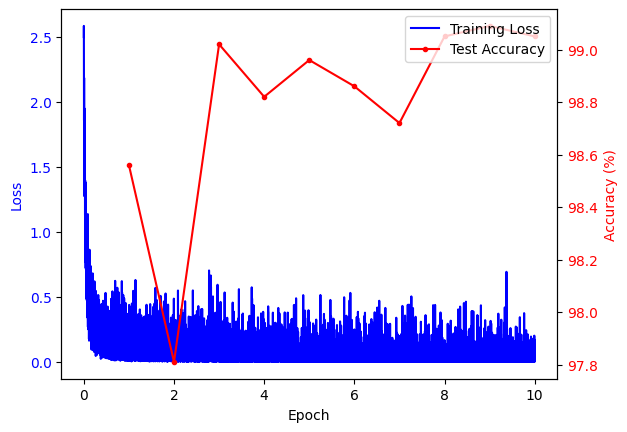

Epoch [1/10], Step [187/1875], Loss: 0.3786
Epoch [1/10], Step [374/1875], Loss: 0.1231
Epoch [1/10], Step [561/1875], Loss: 0.3448
Epoch [1/10], Step [748/1875], Loss: 0.1058
Epoch [1/10], Step [935/1875], Loss: 0.2377
Epoch [1/10], Step [1122/1875], Loss: 0.0458
Epoch [1/10], Step [1309/1875], Loss: 0.0927
Epoch [1/10], Step [1496/1875], Loss: 0.0249
Epoch [1/10], Step [1683/1875], Loss: 0.0303
Epoch [1/10], Step [1870/1875], Loss: 0.0959
Epoch [1/10] - Test Accuracy: 98.56%
Epoch [2/10], Step [187/1875], Loss: 0.0820
Epoch [2/10], Step [374/1875], Loss: 0.0181
Epoch [2/10], Step [561/1875], Loss: 0.0178
Epoch [2/10], Step [748/1875], Loss: 0.1256
Epoch [2/10], Step [935/1875], Loss: 0.1349
Epoch [2/10], Step [1122/1875], Loss: 0.0671
Epoch [2/10], Step [1309/1875], Loss: 0.0935
Epoch [2/10], Step [1496/1875], Loss: 0.0345
Epoch [2/10], Step [1683/1875], Loss: 0.2199
Epoch [2/10], Step [1870/1875], Loss: 0.4864
Epoch [2/10] - Test Accuracy: 97.81%
Epoch [3/10], Step [187/1875], Loss:

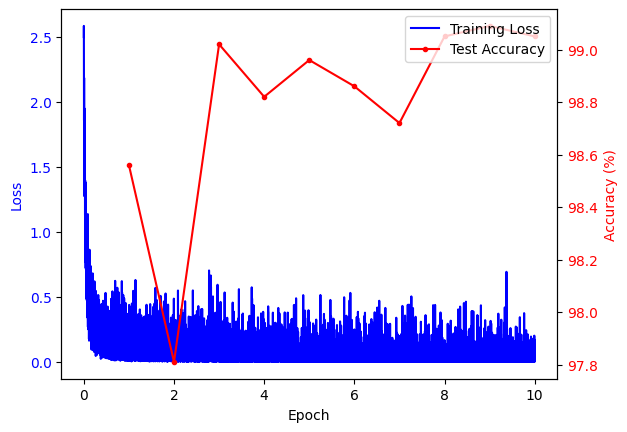

In [5]:
# -- Train the Model ---
history = train_model(
    model,
    train_dataset,
    test_dataset,
    plot=True,
    **hyperparams
)

In [ ]:
# --- Save the Model ---
save_model(model, hyperparams, history, 'hqnn_parallel_mnist_lightning')

Model saved to models/hqnn_parallel_mnist_lightning/hqnn_parallel_mnist_lightning_20250724_140716.pth


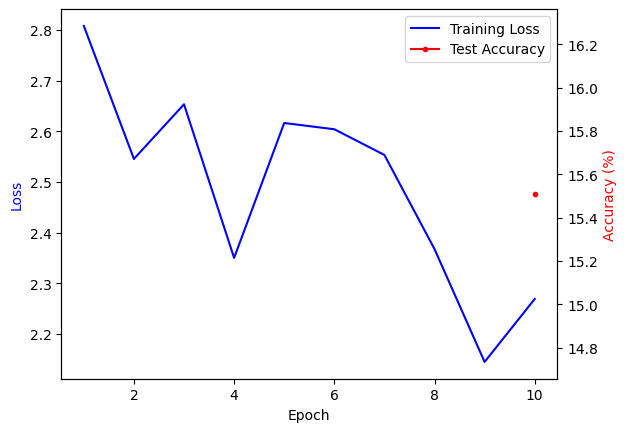

In [3]:
# Optionally load a saved model to evaluate
model = load_model(
    HQNNParallel, 
    'models/hqnn_parallel_mnist_lightning/hqnn_parallel_mnist_lightning_20250724_140716.pth'
)

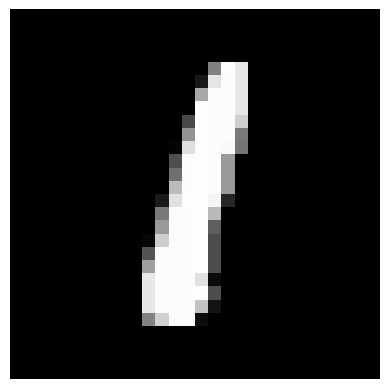

Class 0: 0.1334
Class 1: 0.0985
Class 2: 0.0845
Class 3: 0.0966
Class 4: 0.0925
Class 5: 0.0760
Class 6: 0.1131
Class 7: 0.1042
Class 8: 0.1050
Class 9: 0.0962
Predicted Class: 0, Confidence: 0.1334


In [ ]:
# --- Run Model Prediction on Random Image ---
predict_image(model, test_dataset)

Evaluating Model: 100%|██████████| 10000/10000 [02:21<00:00, 70.70it/s]


              precision    recall  f1-score   support

    0 - zero       0.07      0.15      0.10       980
     1 - one       0.18      0.15      0.16      1135
     2 - two       0.19      0.02      0.03      1032
   3 - three       0.03      0.00      0.00      1010
    4 - four       0.17      0.21      0.19       982
    5 - five       0.06      0.02      0.03       892
     6 - six       0.15      0.20      0.17       958
   7 - seven       0.20      0.50      0.28      1028
   8 - eight       0.28      0.23      0.25       974
    9 - nine       0.11      0.05      0.07      1009

    accuracy                           0.16     10000
   macro avg       0.14      0.15      0.13     10000
weighted avg       0.14      0.16      0.13     10000



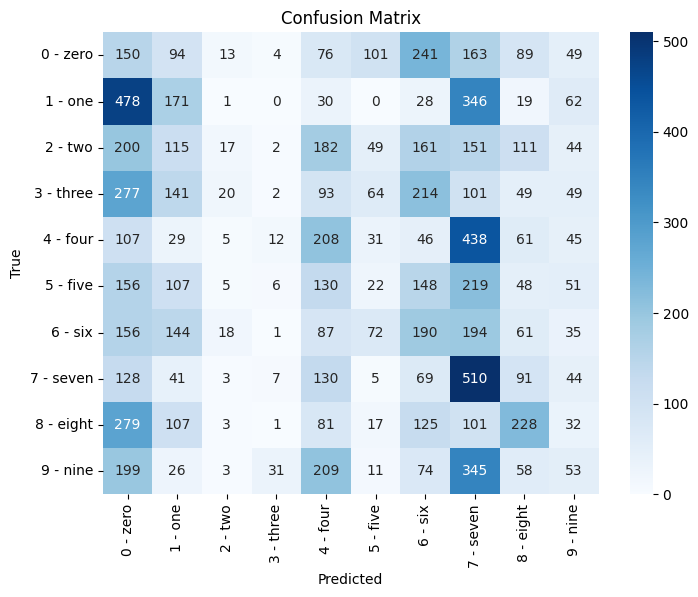

In [5]:
# --- Evaluate Model ---
test_accuracy = evaluate_model(model, test_dataset)

# Training the same model but freezing the classical parts


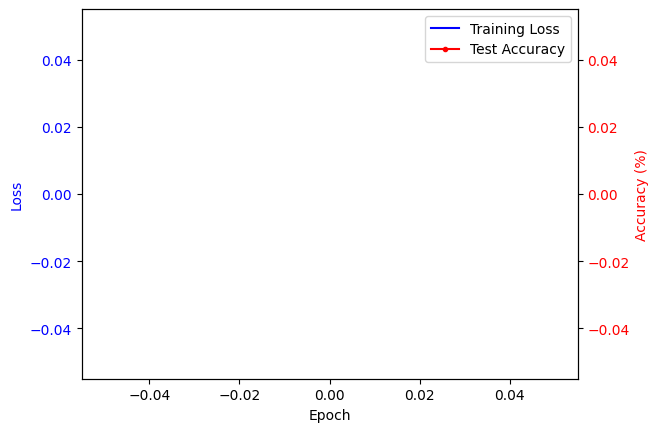

Training interrupted by user. Returning partial history...


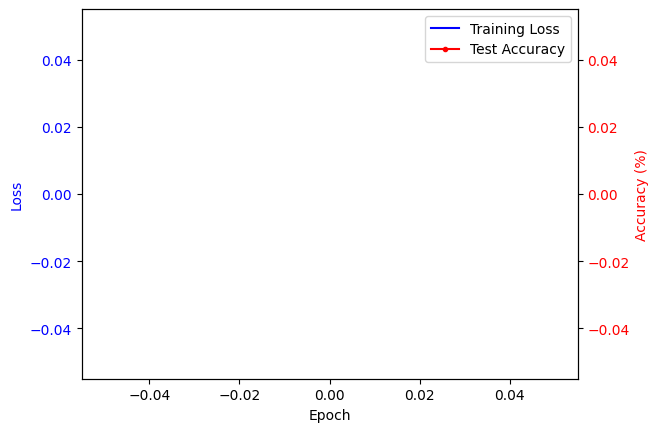

In [ ]:
# --- Training the Frozen Model ---
# Create the model
frozen_model = HQNNParallel(**hyperparams)

# Freeze the classical layers
for param in frozen_model.classical_conv_block.parameters():
    param.requires_grad = False
for param in frozen_model.parallel_quantum_layer.classical_preprocessor.parameters():
    param.requires_grad = False
for param in frozen_model.classical_classifier.parameters():
    param.requires_grad = False

# Run training
frozen_history = train_model(
    frozen_model,
    train_dataset,
    test_dataset,
    plot=True,
    **hyperparams
)

              precision    recall  f1-score   support

           0       0.07      0.04      0.05       980
           1       0.00      0.00      0.00      1135
           2       0.00      0.00      0.00      1032
           3       0.15      0.07      0.09      1010
           4       0.35      0.33      0.34       982
           5       0.13      0.22      0.16       892
           6       0.09      0.15      0.11       958
           7       0.00      0.00      0.00      1028
           8       0.00      0.00      0.00       974
           9       0.11      0.55      0.18      1009

    accuracy                           0.13     10000
   macro avg       0.09      0.14      0.09     10000
weighted avg       0.09      0.13      0.09     10000



/Users/jaimanmunshi/Desktop/VSCode-Workspace/QLab/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/jaimanmunshi/Desktop/VSCode-Workspace/QLab/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/jaimanmunshi/Desktop/VSCode-Workspace/QLab/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to co

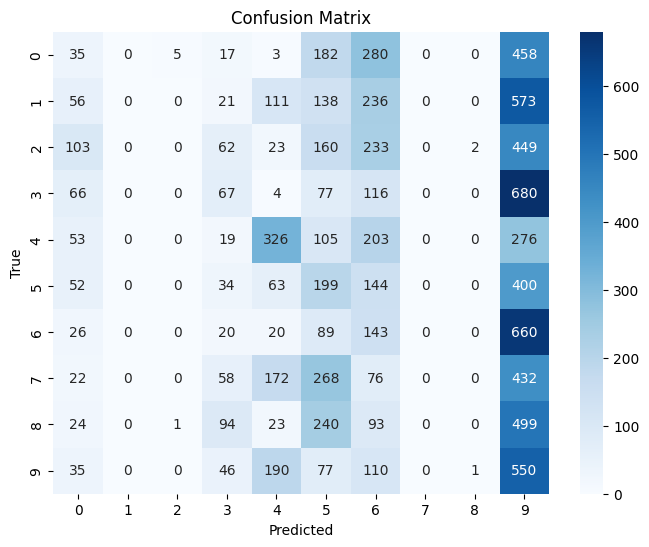

In [ ]:
# Evaluate the frozen model
frozen_test_accuracy = evaluate_model(frozen_model, test_dataset)